
## Convolutional Neural Networks

---

In this notebook, we train a Convolutional Neural Network to classify images from the MNIST database.

### 1. Load MNIST Database

MNIST is one of the most famous datasets in the field of machine learning. 
 - It has 70,000 images of hand-written digits
 - Very straight forward to download
 - Images dimensions are 28x28
 - Grayscale images

In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


In [2]:
print(X_train.shape)  # Should be (num_samples, height, width) or (num_samples, height, width, channels)
print(y_train.shape) 

(60000, 28, 28)
(60000,)


### 2. Visualize the First Six Training Images

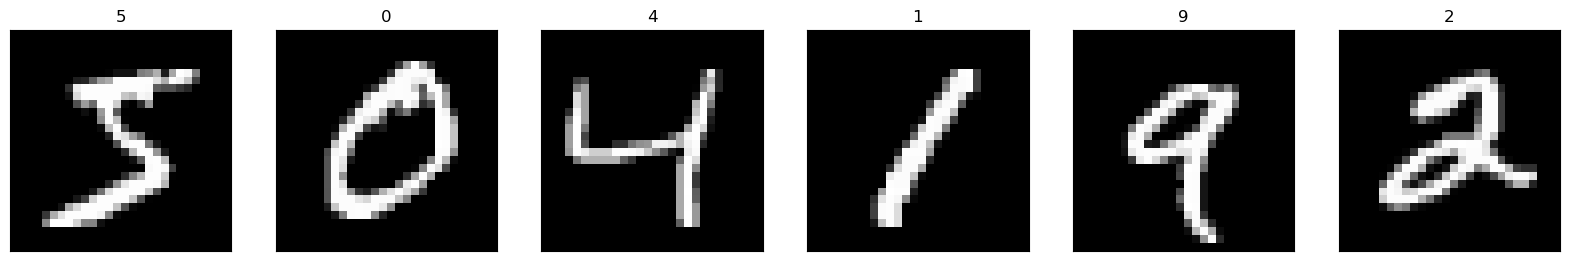

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))
plt.show()

### 3. View an Image in More Detail

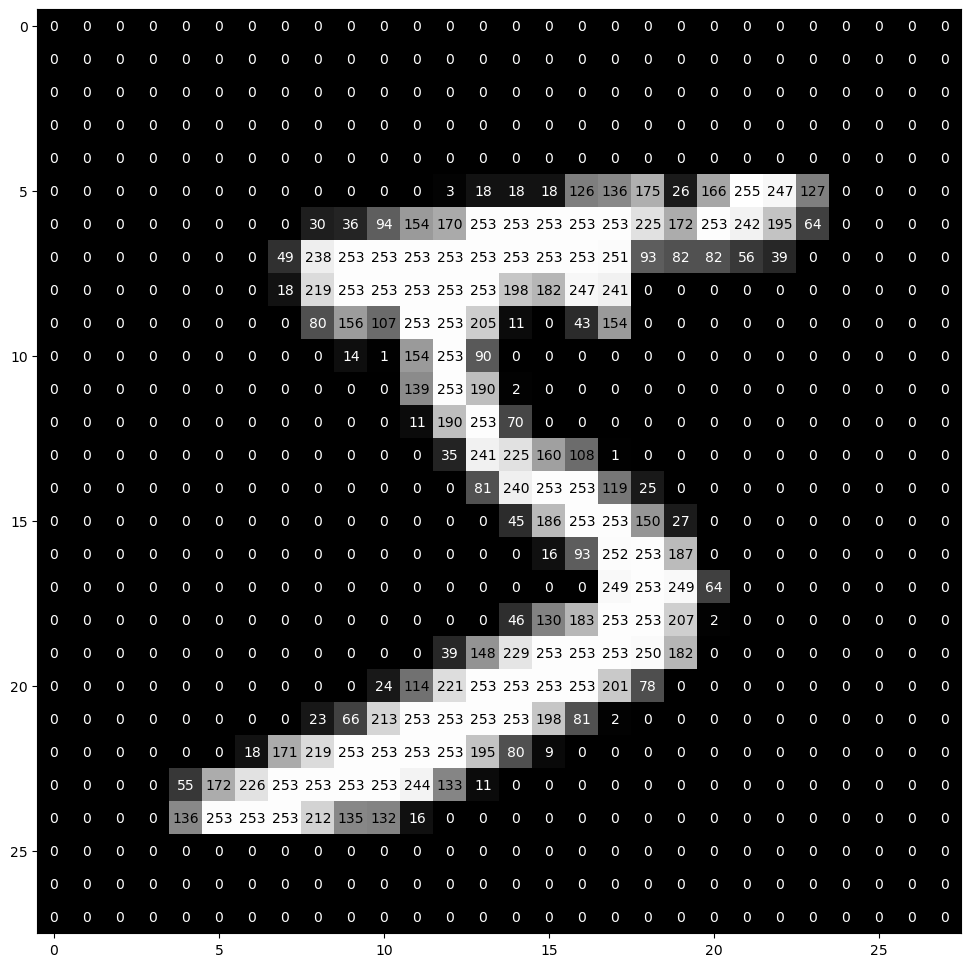

In [4]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)
plt.show()

# 2.Image Processing

### 2.1. Preprocess input images: Rescale the Images by Dividing Every Pixel in Every Image by 255

In [5]:
# rescale to have values within 0 - 1 range [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### 2.2. Preprocess the labels: Encode Categorical Integer Labels Using a One-Hot Scheme

In [6]:
from tensorflow.keras.utils import to_categorical
import numpy as np

num_classes = 10 

# Print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])


Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 2.3. Reshape data to fit our CNN (and input_shape)

In [7]:
# input image dimensions 28x28 pixel images. 
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) #(batch_size, height, width, channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('input_shape: ', input_shape)
print('x_train shape:', X_train.shape)

input_shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


# 3.Model Building

### Define the Model Architecture

You must pass the following arguments:
- filters - The number of filters.
- kernel_size - Number specifying both the height and width of the (square) convolution window.

There are some additional, optional arguments that you might like to tune:

- strides - The stride of the convolution. If you don't specify anything, strides is set to 1.
- padding - One of 'valid' or 'same'. If you don't specify anything, padding is set to 'valid'.
- activation - Typically 'relu'. If you don't specify anything, no activation is applied. You are strongly encouraged to add a ReLU activation function to every convolutional layer in your networks.

** Things to remember ** 
- Always add a ReLU activation function to the **Conv2D** layers in your CNN. With the exception of the final layer in the network, Dense layers should also have a ReLU activation function.
- When constructing a network for classification, the final layer in the network should be a **Dense** layer with a softmax activation function. The number of nodes in the final layer should equal the total number of classes in the dataset.

## 3.1 Import Necessary model Building libraries

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

## 3.2 Initialize the model

In [9]:
# Build the model object
model = Sequential()

## 3.3 Define the input layer

In [10]:
# Explicitly define the input layer
model.add(Input(shape=(28, 28, 1)))  # This replaces `input_shape` in Conv2D

## 3.4 Add Convolution layer and maxpooling layer 1 and 2

In [11]:
# CONV_1: Add convolutional layer with RELU activation and depth = 32 kernels
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
# CONV_2: Increase depth to 64
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

## 3.5 Add Flatten Layer

In [13]:
# Flatten since too many dimensions, we only want a classification output
model.add(Flatten())


## 3.6 Add Fully connected layer

In [14]:
# FC_1: Fully connected layer
model.add(Dense(64, activation='relu'))

## 3.7 Add Output layer

In [15]:

# FC_2: Output softmax layer for classification
model.add(Dense(10, activation='softmax'))


In [16]:
# Show the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

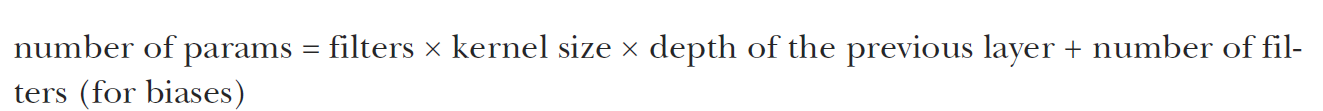

#### Things to notice:

- The network begins with a sequence of two convolutional layers, followed by max pooling layers.
- The final layer has one entry for each object class in the dataset, and has a softmax activation function, so that it returns probabilities.
- The Conv2D depth increases from the input layer of 1 to 32 to 64. 
- We also want to decrease the height and width - This is where maxpooling comes in. Notice that the image dimensions decrease from 28 to 14 after the pooling layer.
- You can see that every output shape has **None** in place of the batch-size. This is so as to facilitate changing of batch size at runtime.
- Finally, we add one or more fully connected layers to determine what object is contained in the image. For instance, if wheels were found in the last max pooling layer, this FC layer will transform that information to predict that a car is present in the image with higher probability. If there were eyes, legs and a tails, then this could mean that there is a dog in the image.

## 3.8. Compile the Model

In [17]:
# rmsprop and Adaptive learning rate (adaDelta) are popular form of gradient descent rivaled only by adam and adagrad 
# categorical ce since we have multiple classes (10) 

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

## 3.9. Train the Model

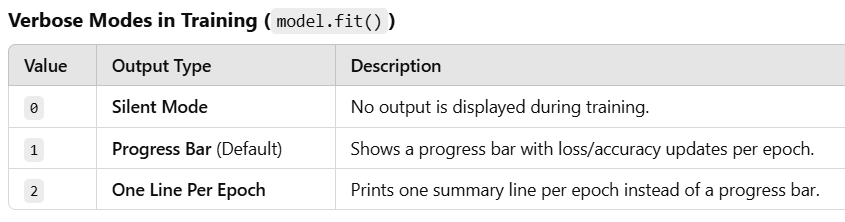

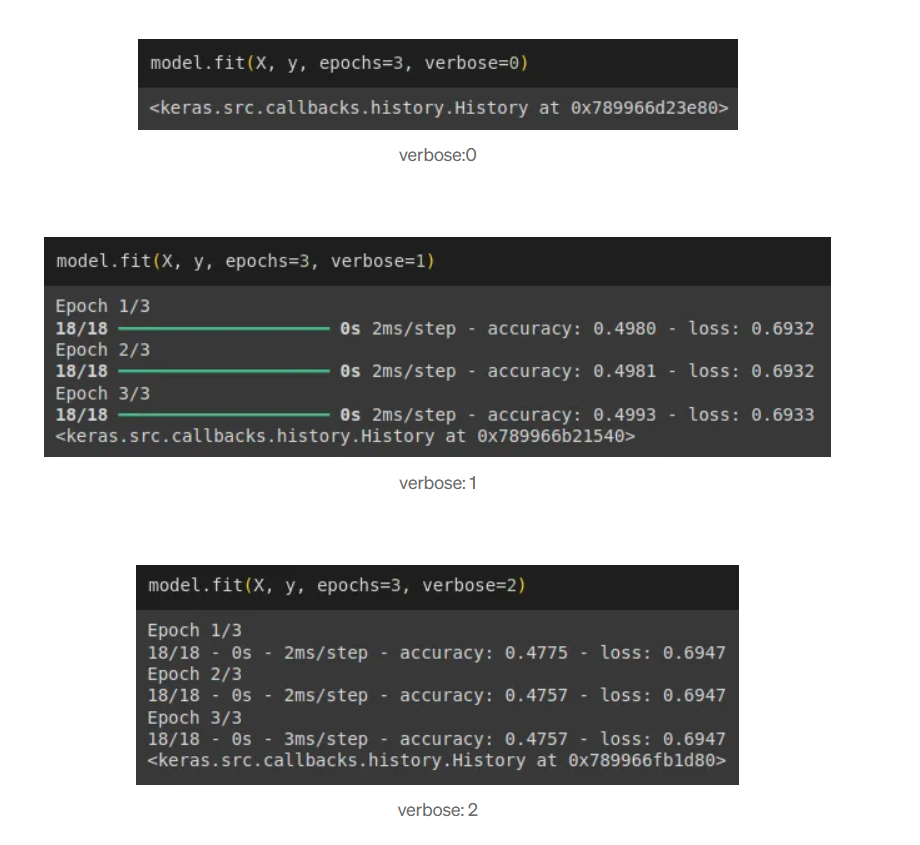

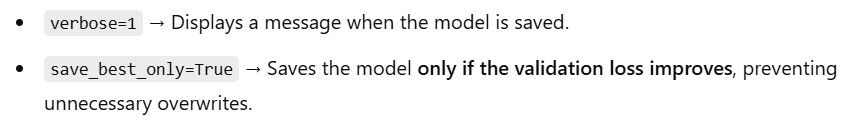

In [18]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.keras', verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=32, epochs=12,
          validation_data=(X_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/12

Epoch 1: val_loss improved from inf to 0.04133, saving model to model.keras
1875/1875 - 36s - 19ms/step - accuracy: 0.9593 - loss: 0.1308 - val_accuracy: 0.9861 - val_loss: 0.0413
Epoch 2/12

Epoch 2: val_loss improved from 0.04133 to 0.03102, saving model to model.keras
1875/1875 - 26s - 14ms/step - accuracy: 0.9870 - loss: 0.0446 - val_accuracy: 0.9896 - val_loss: 0.0310
Epoch 3/12

Epoch 3: val_loss improved from 0.03102 to 0.03088, saving model to model.keras
1875/1875 - 26s - 14ms/step - accuracy: 0.9905 - loss: 0.0306 - val_accuracy: 0.9897 - val_loss: 0.0309
Epoch 4/12

Epoch 4: val_loss improved from 0.03088 to 0.02847, saving model to model.keras
1875/1875 - 24s - 13ms/step - accuracy: 0.9927 - loss: 0.0237 - val_accuracy: 0.9914 - val_loss: 0.0285
Epoch 5/12

Epoch 5: val_loss did not improve from 0.02847
1875/1875 - 25s - 13ms/step - accuracy: 0.9946 - loss: 0.0179 - val_accuracy: 0.9911 - val_loss: 0.0298
Epoch 6/12

Epoch 6: val_loss did not improve from 0.0284

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [19]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.keras')

### 11. Calculate the Classification Accuracy on the Test Set

In [20]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 99.1400%


### Imp note:

MLPs and CNNs do not usually yeild comparable results. The MNIST dataset is very special because it is very clean and perfectly preprocessed. For example, all images have the same size and are centered in a 28x28 pixel grid. It would be a much harder task if the digits were skewed a little or not centered. In the case or real-world messy image data, CNNs will truly SHINE over MLPs. 

For some intuition for why this might be the case, in order to feed an image to an MLP, you must first convert the image to a vector. The MLP then treats the image as a simple vector of numbers with no special structure. It has no knowledge of the fact that these numbers are originally spatially arranged in a grid.

CNNs in contrast, were built for the exact same purpose of working with the patterns in multidimensional data. Unlike MLPs, CNNs understand the fact that image pixels that are closer to each other are heavily related than pixels that are far apart from each other.